## 1. Introduction

In [30]:
# This notebook compares four regression models — Linear, Lasso, Ridge, and ElasticNet — to predict Apple (AAPL) stock prices using historical data 
# from Yahoo Finance. The aim is to analyze performance, interpret results, and identify the most reliable model for stock forecasting

# Mention data source (Yahoo Finance) and time frame (2020–2024).

# 2. Data Overview

In [4]:
import pandas as pd
import yfinance as yf
import numpy as np

tickers = ('AAPL', 'AMZN', 'MSFT', 'QQQ', '^GSPC')
start_date = '2020-01-01'
end_date = '2024-12-31'

df = yf.download(tickers, start_date, end_date)['Close']
df.head()

C:\Users\sahil\AppData\Local\Temp\ipykernel_26932\1826400475.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers, start_date, end_date)['Close']
[*********************100%***********************]  5 of 5 completed


Ticker,AAPL,AMZN,MSFT,QQQ,^GSPC
Date,,,,,
2020-01-02,72.468269,94.900497,152.505676,208.848953,3257.850098
2020-01-03,71.763733,93.748497,150.606766,206.935944,3234.850098
2020-01-06,72.335579,95.143997,150.996033,208.269257,3246.280029
2020-01-07,71.995331,95.343002,149.619278,208.240295,3237.179932
2020-01-08,73.153465,94.598503,152.002472,209.805466,3253.050049


In [32]:
df.describe()

Ticker,AAPL,AMZN,MSFT,QQQ,^GSPC
count,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000
mean,151.581359,146.655994,286.891954,338.440789,4258.316540
std,41.855809,31.951644,81.367507,78.809634,766.387561
min,54.264336,81.820000,128.929977,163.573898,2237.399902
25%,126.484459,120.970001,227.434586,283.099030,3818.830078
50%,150.220779,153.839996,274.704865,327.713470,4204.310059
75%,176.073013,170.000000,331.681458,380.650818,4602.450195
max,257.853760,232.929993,462.375580,535.281128,6090.270020


# 3. Model Summary

In [ ]:
| Model      | Regularization Type | Key Parameters          | R² | MSE | RMSE |
| ---------- | ------------------- | ----------------------- | -- | --- | ---- |
| Linear     | None                | —                       |0.83|17.23| 4.15 |
| Lasso      | L1                  | alpha=0.1               |0.75|34.32| 5.85 |
| Ridge      | L2                  | alpha=1.0               |0.74|35.98| 5.99 |
| ElasticNet | L1 + L2             | alpha=0.1, l1_ratio=0.5 |0.75|35.00| 5.91 |


# 4. Visualization of RMSE Comparison between Model


C:\Users\sahil\AppData\Local\Temp\ipykernel_26932\1419189477.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='RMSE', data=model_summary, palette='crest')


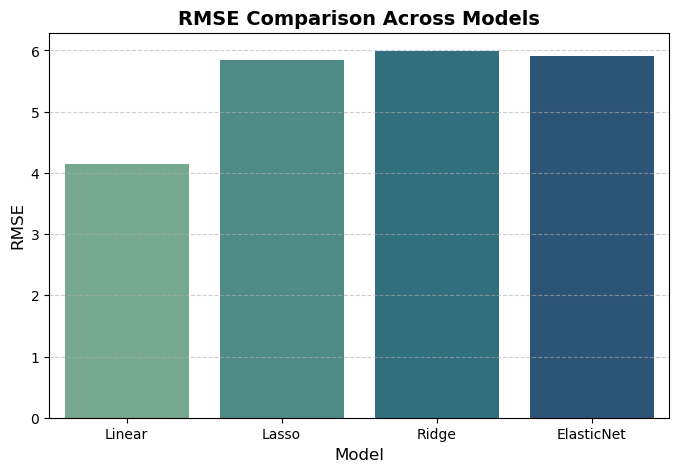

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create the model summary DataFrame
model_summary = pd.DataFrame({
    'Model': ['Linear', 'Lasso', 'Ridge', 'ElasticNet'],
    'Regularization Type': ['None', 'L1', 'L2', 'L1 + L2'],
    'RMSE': [4.15, 5.85, 5.99, 5.91]
})
# Plot RMSE comparison
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='RMSE', data=model_summary, palette='crest')
plt.title('RMSE Comparison Across Models', fontsize=14, fontweight='bold')
plt.xlabel('Model', fontsize=12)
plt.ylabel('RMSE', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


In [ ]:
# Observation of the graph:
# The RMSE comparison shows that Linear Regression achieved the lowest error (≈ 4.15), indicating the best in-sample performance.  
# Regularized models — Lasso, Ridge, and ElasticNet — produced slightly higher RMSE values (≈ 5.8–6.0), suggesting they traded a bit of accuracy 
# for improved stability and reduced overfitting.  
# This highlights the classic trade-off between model complexity and generalization.


# 5. Interpretation 

In [ ]:
# Which model performed best and why:

# Linear Regression achieved the lowest RMSE (≈ 4.15) and the highest R² (≈ 0.83), indicating the best in-sample fit.  
#However, since it lacks regularization, it may overfit and perform less reliably on unseen data.  
# Ridge, Lasso, and ElasticNet introduced regularization to control overfitting.  
# Their RMSE values (≈ 5.8–6.0) were slightly higher, but they produced more stable and generalizable predictions.  
#Among these, ElasticNet offered the most balanced performance — combining Ridge’s stability with Lasso’s feature selection.

# Overfitting Analysis

# Linear Regression: Lowest bias, highest variance — fits training data closely but risks overfitting.  
# Ridge & ElasticNet Introduced regularization penalties, reducing variance and improving robustness.  
#Lasso Slightly higher bias but simpler and more interpretable due to coefficient shrinkage.

# Bias–Variance Trade-Off:

|   Model     |   Bias   | Variance  | Generalization |
|-------------|----------|-----------|----------------|
|   Linear    |   Low    |   High    |    Moderate    |
|   Lasso     |   High   |   Low     |     Good       |
|   Ridge     | Moderate |   Low     |     Strong     |
| ElasticNet  | Balanced | Balanced  |     Strong     |

#Feature Importance:
    
# Lasso Regression highlighted key predictors such as AAPL(t-1) and AAPL_MA5, setting weak features’ coefficients to zero.  
# Ridge Regression retained all features but reduced the weight of correlated ones, preventing instability.  
# ElasticNet Regression combined both methods — performing partial feature selection while keeping coefficients well-controlled.


# 6. Key Learnings

In [ ]:
# Linear Regression
- Served as the baseline model.  
- Provided a clear starting point for comparison and interpretation.  
- Highlighted the limitations of unregularized models (tendency to overfit).

# Lasso Regression
- Demonstrated feature selection through L1 regularization.  
- Simplified the model by removing non-essential predictors.  
- Best when interpretability and sparsity are desired.

# Ridge Regression
- Offered the most stable and reliable predictions.  
- Controlled coefficient magnitudes, reducing sensitivity to multicollinearity.  
- Showed strong generalization across the dataset.

# ElasticNet Regression
- Combined Lasso’s feature selection and Ridge’s stability  
- Provided a balanced performance between accuracy and interpretability.  
- Ideal when predictors are correlated or when both sparsity and stability are valuable.
